In [1]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
#return imgs imformation
ytrain.shape

(60000,)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytest.shape

(10000,)

In [7]:
#firstly return numeric format data and array.you can imagin total 28 rows and 28 columns return.
# 0 means totally white pixel
#and 255 value is exactly back colour.
#this dataset is black and white images. 
xtrain[0]
     

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
#return 9 means;this is class_lables.each index store labels.
ytrain[0]    #-------->0 means;checking 0 index label.
#0 -> T-shirt/top 
#1 -> Trouser 
#2 -> Pullover 
#3 -> Dress 
#4 -> Coat 
#5 -> Sandal 
#6 -> Shirt 
#7 -> Sneaker 
#8 -> Bag 
#9 -> Ankle boot

9

In [9]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

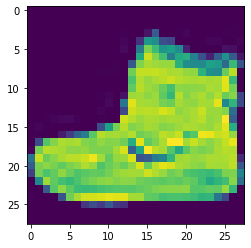

In [10]:
#this imshow function used to xtrain data means(numeric format) then i converted in pixel format to use the imshow function.
#and this return img is very blur because resolution is 28/28 
plt.imshow(xtrain[0])

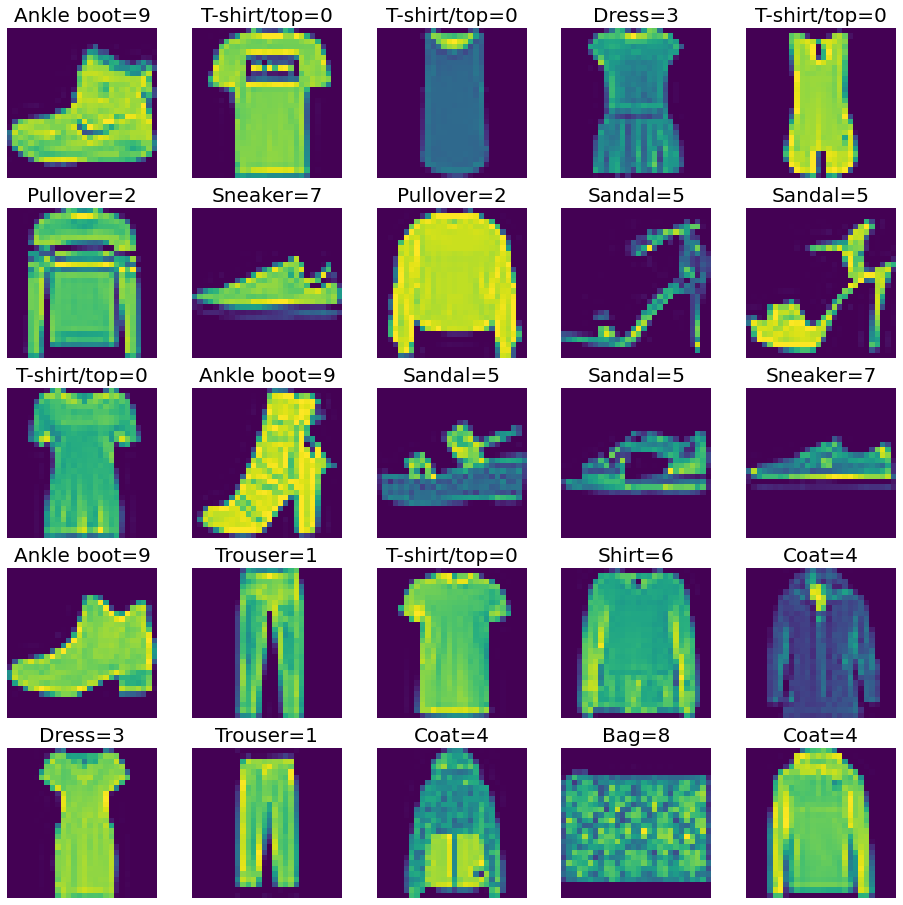

In [12]:
#total 25 return img and lables.this 25 images pass to neural network 
#then i train the data can any use one img.after my netural network classifying img.
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i])
  plt.axis("off")
  plt.title(class_labels[ytrain[i]]+"="+str(ytrain[i]),fontsize=20)
     

In [13]:
#0 to 255 values the after i try to normalize.
#to converted 0 to 1 range values.
xtrain=xtrain/255
xtest=xtest/255


In [14]:
#this is 0 index label images.and return values range is 0 to 1.
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model=keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [16]:
#return flatten layer shape id total 784 input and parameter value is 0.
#dense layer shape is 32 input means;i mention the input and parameter value is 25120. 
#dense_1 layer shape is 10 mean this output layer and parameter value is 330.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [17]:
#after then my model is compile process optimzer is adms,
#loss is using sparse_categorical_crossentropy because i perform classfiction problem.
#then i find loss after then i find accuracy i using merics.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history=model.fit(xtrain,ytrain,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.6062 - accuracy: 0.7956 - val_loss: 0.4600 - val_accuracy: 0.8411
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4410 - accuracy: 0.8470 - val_loss: 0.4203 - val_accuracy: 0.8547
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4016 - accuracy: 0.8611 - val_loss: 0.4258 - val_accuracy: 0.8481
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3766 - accuracy: 0.8686 - val_loss: 0.3917 - val_accuracy: 0.8607
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3608 - accuracy: 0.8729 - val_loss: 0.3743 - val_accuracy: 0.8680
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3467 - accuracy: 0.8767 - val_loss: 0.3856 - val_accuracy: 0.8659
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3360 - accuracy: 0.8811 - val_loss: 0.3594 - val_accuracy: 0.8735
Epoch 

In [19]:

#then training my neural network
model.fit(xtrain,ytrain,epochs=5)   #---->epochs means;iteration 

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3323 - accuracy: 0.8811
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3160 - accuracy: 0.8851
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3079 - accuracy: 0.8881
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3027 - accuracy: 0.8905
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2957 - accuracy: 0.8927


In [20]:
#after update the epochs values 10 then loss is slowly each epochs is decreasing value and show me.
#and accuracy is improving.
model.fit(xtrain,ytrain,epochs=10)       #--------->#---->epochs means;iteration

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2888 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.8977
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2737 - accuracy: 0.8997
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2684 - accuracy: 0.9014
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.9016
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2617 - accuracy: 0.9036
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2549 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.251

In [21]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8708


[0.37588202953338623, 0.8708000183105469]

In [22]:
ypred=model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [23]:
#there are return 10 classes you can imaging max value return 9th number of class predicted to neural network 
ypred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
      dtype=float32)

In [24]:
#i find the index of 9th class labels
#and return index number 
np.argmax(ypred[0].round(2))

9

In [25]:
#i check to the actual values.
ytest[0]

9

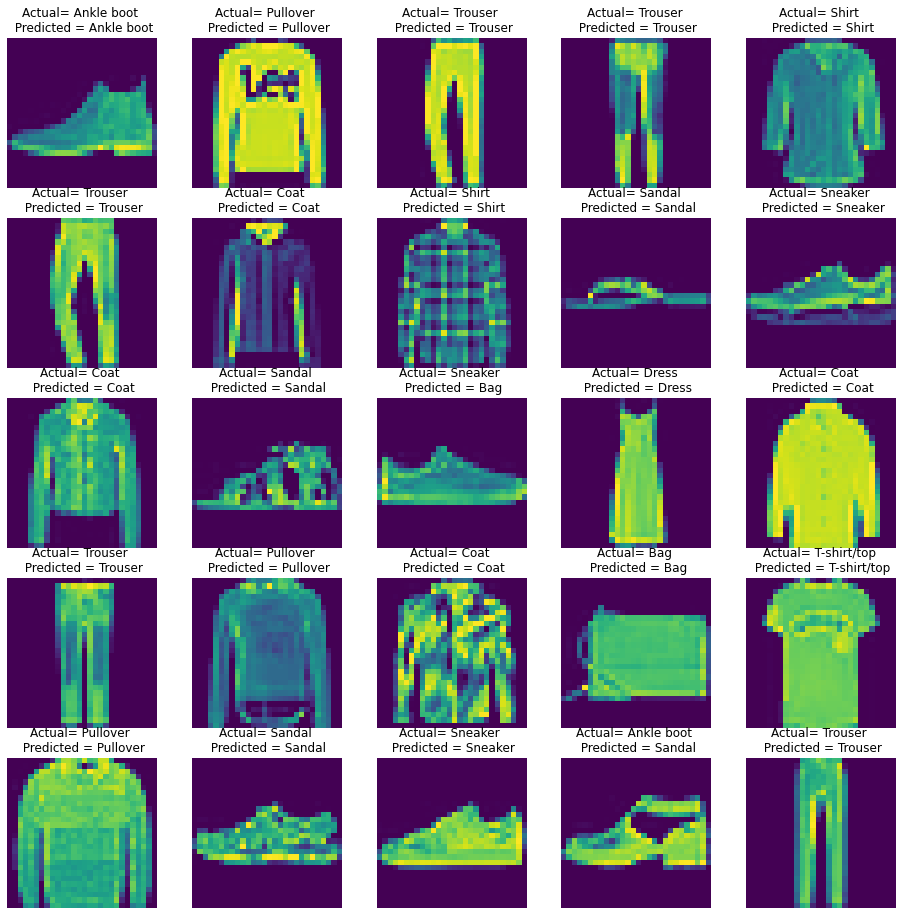

In [26]:
#look at this all img actual values and predicted values
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtest[i],)
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[ytest[i]], class_labels[np.argmax(ypred[i])]))
     

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,[np.argmax(i) for i in ypred])

<AxesSubplot:>

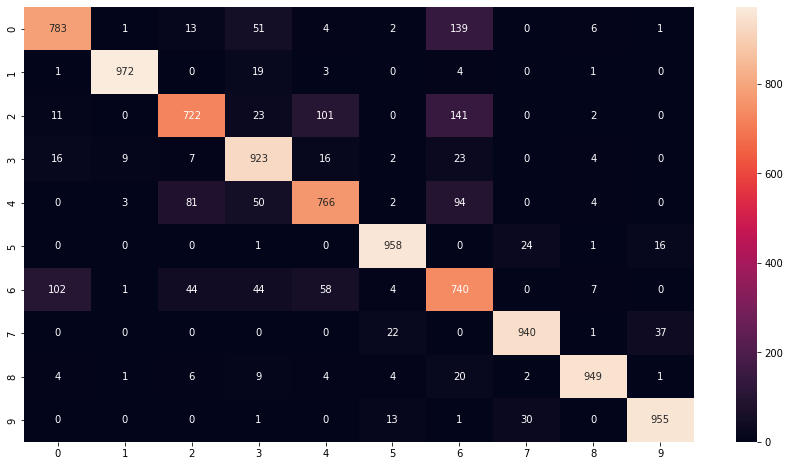

In [28]:
#draw a heatmap plot.
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,[np.argmax(i) for i in ypred],target_names=class_labels)

In [30]:
#all class labels are return precision,recall,f1-score
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.78      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.83      0.72      0.77      1000
       Dress       0.82      0.92      0.87      1000
        Coat       0.80      0.77      0.78      1000
      Sandal       0.95      0.96      0.95      1000
       Shirt       0.64      0.74      0.68      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



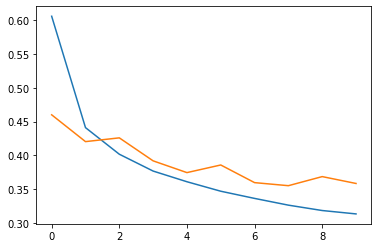

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

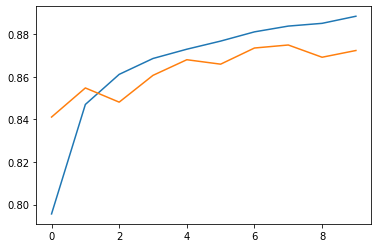

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [33]:

#Visualizing Loss and Accuracy
import matplotlib.pyplot as plt

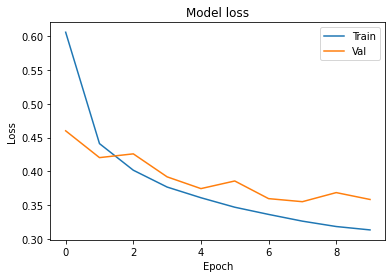

In [34]:

#Here,I have visualize the training loss and validation loss.
plt.plot(history.history['loss'])
plt.plot(history .history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

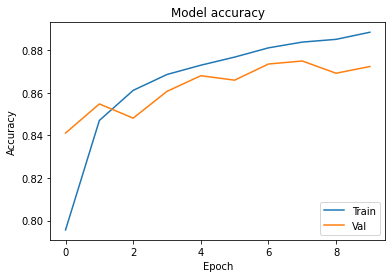

In [35]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()